In [4]:
from sklearn.model_selection import train_test_split
import pandas
import numpy
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from pprint import pprint
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import linkage, fcluster

**Reading Data**

In [5]:
data = pandas.read_csv('cs-training.csv')

In [6]:
# data.head()

**Removing NaNs and cleaning data**

In [7]:
data.dropna(axis=0,how='any',subset=['NumberOfDependents'],inplace=True)
data.dropna(axis=0,how='any',subset=['MonthlyIncome'],inplace=True)
data.reset_index()

train_frame = data[data.columns[1:]]
train_frame.columns[1:]

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [8]:
train_frame.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


**Creating new features and cleaning more**

In [9]:
train_frame['MonthlyDebt'] = train_frame['DebtRatio']*train_frame['MonthlyIncome']
train_frame['NumOfPastDue'] = train_frame['NumberOfTimes90DaysLate']+train_frame['NumberOfTime60-89DaysPastDueNotWorse'] +train_frame['NumberOfTime30-59DaysPastDueNotWorse']
train_frame['MonthlyBalance'] = train_frame['MonthlyIncome']-train_frame['MonthlyDebt']

# We need only the observations where MonthlyBalance is positive
train_frame = train_frame[train_frame['MonthlyBalance'] > 0]

**Plot the distribution of each variable to see how skewed they are**

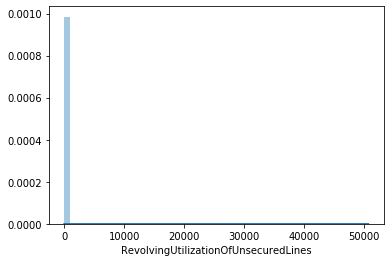

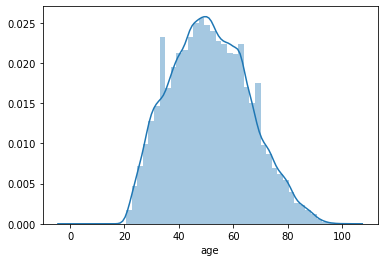

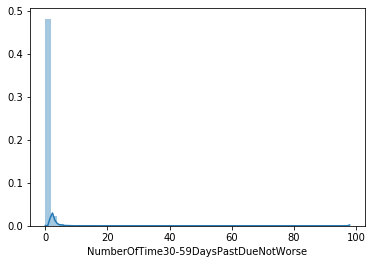

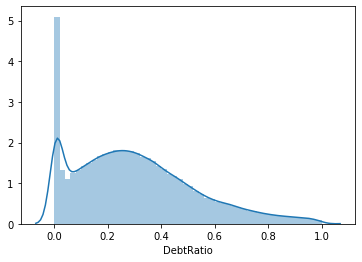

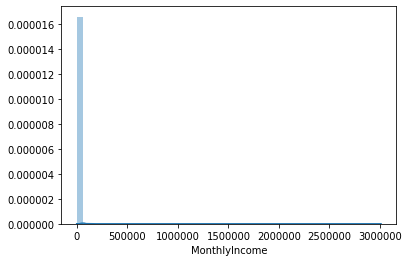

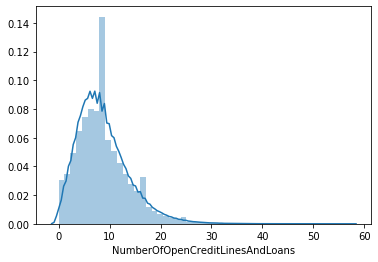

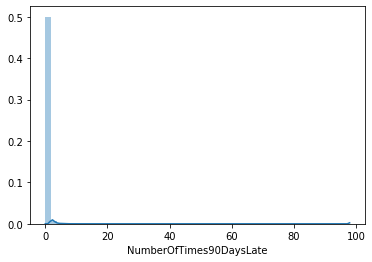

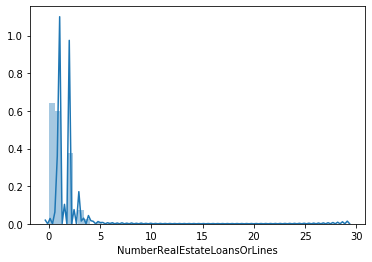

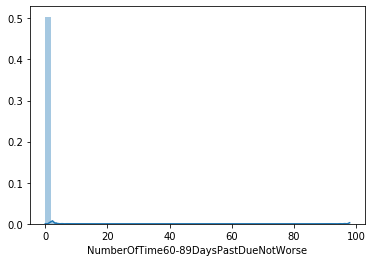

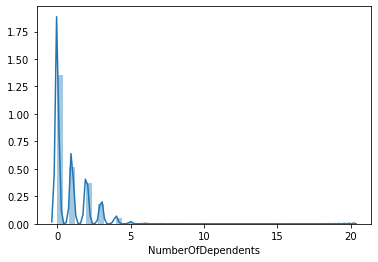

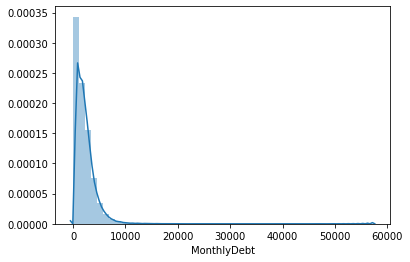

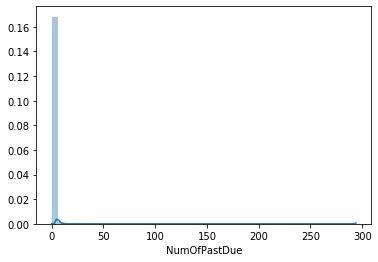

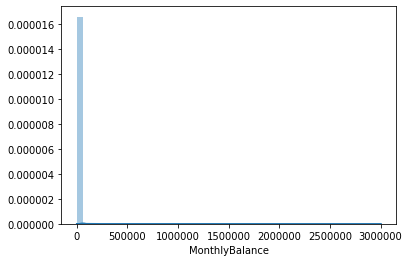

In [10]:
for each in train_frame.columns[1:]:
    sns.distplot(train_frame[each])
    plt.show()

**Taking log transform to reduce skeweness in some variables**

In [11]:
for column in ['RevolvingUtilizationOfUnsecuredLines', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumOfPastDue', 'MonthlyBalance', 'MonthlyDebt',
              'MonthlyIncome', 'DebtRatio', 'NumberRealEstateLoansOrLines', "NumberOfOpenCreditLinesAndLoans" ]:
    train_frame[column] = numpy.log10(1 + train_frame[column].values)

**Plot distribution again**

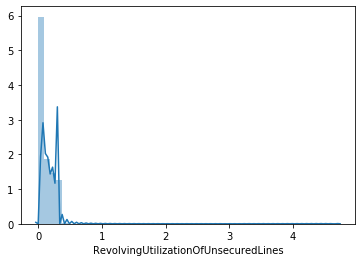

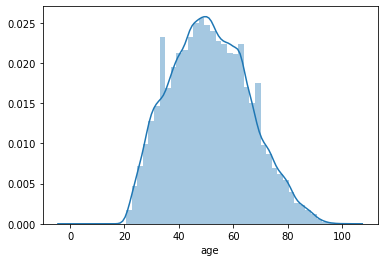

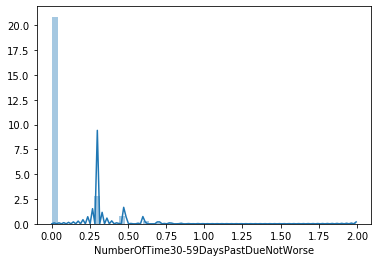

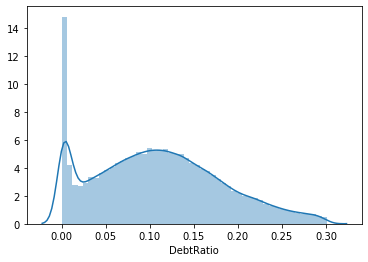

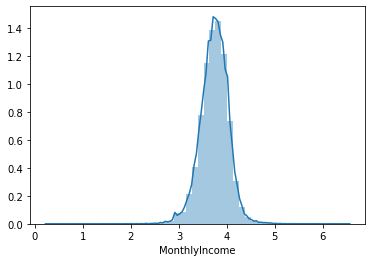

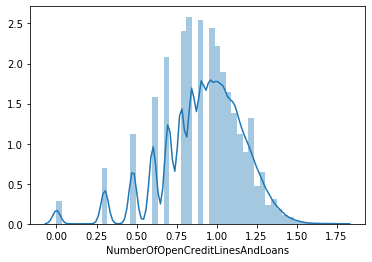

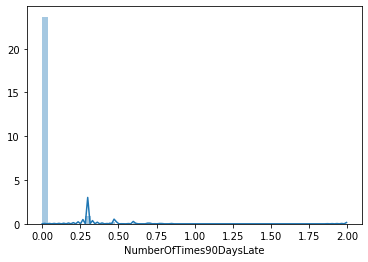

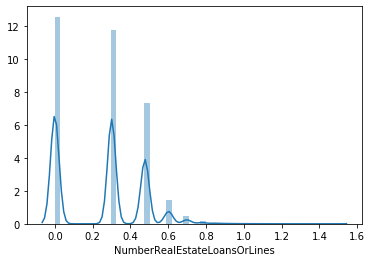

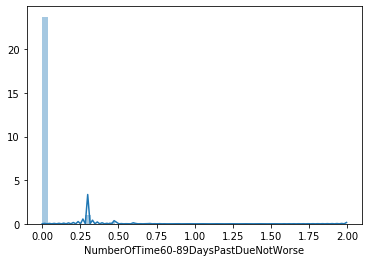

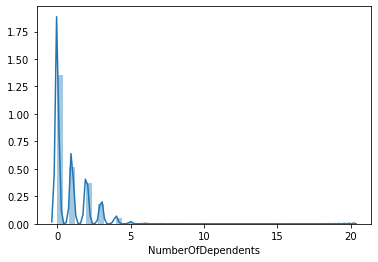

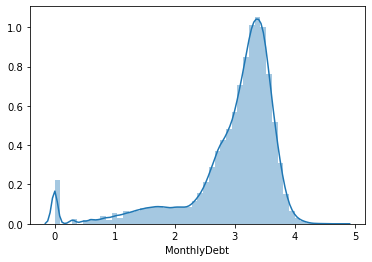

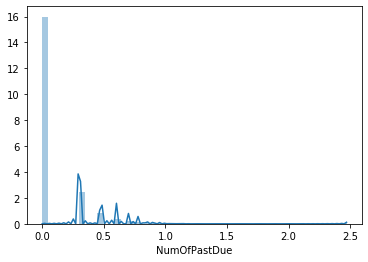

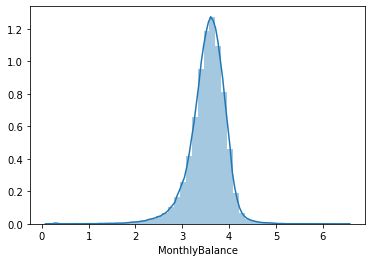

In [12]:
for each in train_frame.columns[1:]:
    sns.distplot(train_frame[each])
    plt.show()

**Removing outliers**

In [13]:
train_frame = train_frame[train_frame['age'] != 0]
train_frame = train_frame[train_frame['age'] !=99]
train_frame = train_frame[train_frame['age'] !=101]

**Choosing features and splitting dataset**

In [256]:
features = ['RevolvingUtilizationOfUnsecuredLines', 'age',
        'MonthlyIncome', 'DebtRatio', 'MonthlyDebt', 'NumOfPastDue', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTime30-59DaysPastDueNotWorse',
       'NumberOfDependents']
x = train_frame[features]
y = train_frame['SeriousDlqin2yrs']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=0)

**Taking a scalar transform**

In [257]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train, x_test = scaler.transform(x_train), scaler.transform(x_test)

In [258]:
def evaluate(X, y_test, y_pred):
    ret_str = ''
    ret_str += 'Adjusted Rand Index: {}'.format( metrics.adjusted_rand_score(y_test, y_pred) ) + '\n'
    ret_str += 'Silhouette Coefficient: {}'.format( metrics.silhouette_score(X, y_pred, metric = "euclidean") )
    return ret_str   

In [300]:
def k_means(X, y_test):
    clustering = KMeans(n_clusters = 2, init = "random", n_init = 3, max_iter=300, tol = 2, random_state = 0, algorithm = "elkan").fit(X)
    clusters = clustering.labels_
    cont_matrix = metrics.cluster.contingency_matrix(y_test, clusters)
    ax = sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5) #to fix glitch 
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Contingency matrix')
    plt.tight_layout()
    
    #print(evaluate(x, y_test, clusters))2

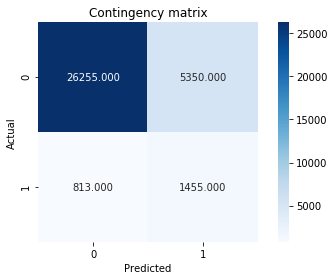

In [301]:
k_means(x_test, y_test)